<a href="https://colab.research.google.com/github/Amrutak2/Deep-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amruta Kulkarni-20MAI0027


LSTM Models For Univariate Time Series Forecasting

In [54]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [55]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [56]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [57]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [58]:
X.shape

(6, 3)

In [59]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


Building LSTM Model

In [60]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 32500.3730
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 31901.4609
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 31320.1562
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 30763.4277
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 30225.7715
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 29708.4375
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 29216.5488
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 28751.2871
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 28290.6621
Epoch 10/300
1/1 [==============================] - 0s 15ms/step - loss: 27813.8457
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 27315.6016
Epoch 12/300
1/1 [==============================] - 0s 9ms/step - loss: 26829.9609
Epoch 13/300

Predicting For the next 10 data

In [61]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[220.53496]
1 day input [196.         210.         220.53495789]
1 day output [[230.83798]]
2 day input [210.         220.53495789 230.83798218]
2 day output [[241.58719]]
3 day input [220.53496 230.83798 241.58719]
3 day output [[251.48482]]
4 day input [230.83798 241.58719 251.48482]
4 day output [[261.3399]]
5 day input [241.58719 251.48482 261.3399 ]
5 day output [[271.34616]]
6 day input [251.48482 261.3399  271.34616]
6 day output [[281.10223]]
7 day input [261.3399  271.34616 281.10223]
7 day output [[290.92288]]
8 day input [271.34616 281.10223 290.92288]
8 day output [[300.89218]]
9 day input [281.10223 290.92288 300.89218]
9 day output [[310.84073]]
[220.53496, 230.83798, 241.58719, 251.48482, 261.3399, 271.34616, 281.10223, 290.92288, 300.89218, 310.84073]


In [62]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [64]:
len(timeseries_data)

9

In [68]:
lst_output

[220.53496,
 230.83798,
 241.58719,
 251.48482,
 261.3399,
 271.34616,
 281.10223,
 290.92288,
 300.89218,
 310.84073]

Visualizaing The Output

In [71]:
import matplotlib.pyplot as plt

In [72]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

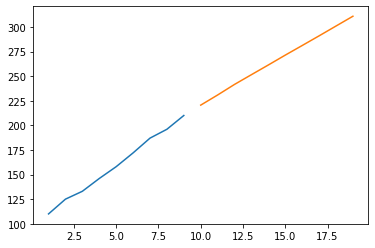

In [73]:

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)